# HDF5 Archives

An important issue when it comes to numerical calculations is to save data in a compact, portable and light way, which allows for easy recovery. To this end, the objects in TRIQS
are save into hdf5 archives. The interface in TRIQS allows
to recover objects directly, as they were saved. Let us first import the relevant module:

In [1]:
from h5 import HDFArchive

# Writing to an archive

We initialize a Green's function and write it to file together with a number

In [2]:
from triqs.gf import Gf, MeshReFreq, SemiCircular
w_mesh = MeshReFreq(window=[-2,2], n_w=1000)
G = Gf(mesh=w_mesh, target_shape=[])
G << SemiCircular(1.0)

with HDFArchive("my_archive.h5",'w') as A:
    A['number'] = 12
    A['G'] = G

Here, `'w'` means we overwrite the archive if there was an existing one. If you want to append information to an
existing archive without destroying it, use `'a'`. An archive essentially behaves like a python dictionary, i.e. we can put any object in there

From the shell we can now see the new file and check what is in it

In [3]:
!ls *.h5

my_archive.h5


In [4]:
!h5ls my_archive.h5

G                        Group
number                   Dataset {SCALAR}


Note: The `!` allows to run shell commands from the notebook. `h5ls` is a command that lists the entries in an archive.

## Reading from an archive

Of course, later on we want to read from our saved archive.
We just open it again (the `'r'` flags means that we just read from the archive and
cannot modify it)

HDFArchive (partial view) with the following content:
  G : subgroup
  number : data 
Number =  12


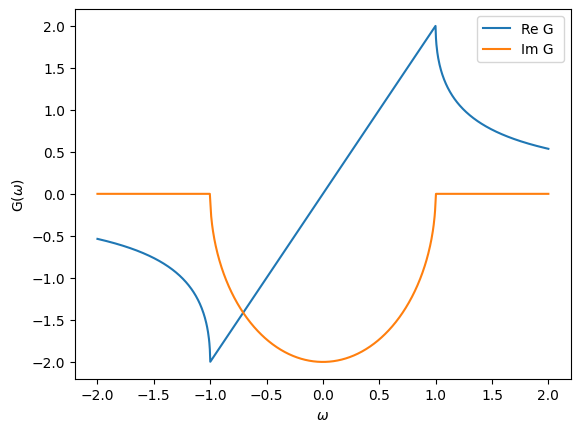

In [5]:
with HDFArchive("my_archive.h5",'r') as A:
    # show the contents of the archive
    print(A)
    
    # read the number from B
    print("Number = ", A['number'])
    
    # read the Green's function
    G = A['G']
    
from triqs.plot.mpl_interface import oplot
%matplotlib inline
oplot(G, name = 'G')